# Validate PFOA PBK model implementation in Antimony

In [1]:
import re

import pandas as pd
import tellurium as te
import libsbml as ls
import pandas as pd
import seaborn as sns

fn_ant = '../Model/Antimony/PBK_PFOA.ant'
fn_R = '../Results/validation_result.csv'

In [2]:
r = te.loada(fn_ant)
result_ant = r.simulate(0,18750,18750,['age', 'AL', 'VL','PL_PFOA','Aart','Vart_plas','Free_PFOA', 'AG', 'VG','PG_PFOA', 'AR', 'VR', 'PR_PFOA', 'ASk', 'VSk', 'PSk_PFOA',
                                       'BW', 'Inhalation_PFOA','Oraldose_PFOA', 'QC'])

df_result = pd.DataFrame(result_ant, columns = result_ant.colnames)
df_result['Cart'] = (df_result['Aart'] / df_result['Vart_plas']  ) / df_result['Free_PFOA']
df_result['CVL'] = ( df_result['AL'] / df_result['VL'] ) /  df_result['PL_PFOA']
df_result['CVG'] = ( df_result['AG'] / df_result['VG'] ) /  df_result['PG_PFOA']
df_result['CVR'] = ( df_result['AR'] / df_result['VR'] ) /  df_result['PR_PFOA']
df_result['CSk'] = ( df_result['ASk'] / df_result['VSk'] )

df_result

,age,AL,VL,PL_PFOA,Aart,Vart_plas,Free_PFOA,AG,VG,PG_PFOA,...,PSk_PFOA,BW,Inhalation_PFOA,Oraldose_PFOA,QC,Cart,CVL,CVG,CVR,CSk
0,0.000000,0.311598,0.095680,2.2,0.001538,0.061427,0.02,0.004659,0.062928,0.05,...,0.1,3.680000,0.0,0.048000,797.089556,1.252308,1.480302,1.480692,0.676255,0.000000
1,0.002740,0.251861,0.095998,2.2,0.001455,0.061631,0.02,0.003818,0.063137,0.05,...,0.1,3.692247,0.0,0.048000,799.078182,1.180114,1.192543,1.209562,1.175065,0.117842
2,0.005480,0.271746,0.096317,2.2,0.001571,0.061835,0.02,0.004116,0.063347,0.05,...,0.1,3.704492,0.0,0.048000,801.064934,1.270035,1.282443,1.299410,1.265004,0.126836
3,0.008220,0.291603,0.096635,2.2,0.001687,0.062040,0.02,0.004412,0.063556,0.05,...,0.1,3.716735,0.0,0.048000,803.049818,1.359231,1.371622,1.388534,1.354218,0.135758
4,0.010959,0.311432,0.096953,2.2,0.001802,0.062244,0.02,0.004709,0.063766,0.05,...,0.1,3.728978,0.0,0.048000,805.032842,1.447711,1.460084,1.476942,1.442716,0.144607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,51.358904,8.429279,1.835138,2.2,0.049181,1.178159,0.02,0.126012,1.206956,0.05,...,0.1,70.582240,0.0,0.013199,7305.380387,2.087199,2.087848,2.088090,2.087201,0.208720
18746,51.361643,8.429197,1.835120,2.2,0.049181,1.178147,0.02,0.126010,1.206944,0.05,...,0.1,70.581540,0.0,0.013199,7305.326004,2.087200,2.087849,2.088091,2.087202,0.208720
18747,51.364383,8.429115,1.835102,2.2,0.049180,1.178135,0.02,0.126009,1.206932,0.05,...,0.1,70.580839,0.0,0.013199,7305.271622,2.087200,2.087849,2.088091,2.087202,0.208720
18748,51.367123,8.429033,1.835084,2.2,0.049180,1.178124,0.02,0.126008,1.206920,0.05,...,0.1,70.580139,0.0,0.013198,7305.217241,2.087200,2.087850,2.088092,2.087203,0.208720


Antimony outputs amount (due to 'substancelonly'), but we are in fact interested in concentrations. The code block above converts the amounts to concentrations after loading the model. Ideally, however, one would want to have this conversion to be done internally, within the antimony model. I am not sure yet how to do this.

In [3]:
result_R = pd.read_csv(fn_R)
result_R

,Unnamed: 0,time,day,dayoftheweek,month,year,age,BW,SkinTarea,kurine_PFOA,...,CVG_PFOS,CL_PFOS,CVL_PFOS,CF_PFOS,CVF_PFOS,CK_PFOS,CVK_PFOS,Cfil_PFOS,CR_PFOS,CVR_PFOS
0,1,0,1,1,1,1,0.000000,3.680000,2157.227955,0.005198,...,1.711786,6.364967,1.711013,0.238724,1.705172,1.630435,2.038043,0.000069,0.340946,1.704730
1,2,1,2,2,1,1,0.002740,3.692246,2162.006232,0.005194,...,1.787031,6.590521,1.771646,0.244686,1.747755,1.687954,2.109943,0.000071,0.351018,1.755092
2,3,2,3,3,1,1,0.005479,3.704490,2166.778674,0.005190,...,1.841013,6.791524,1.825678,0.252249,1.801782,1.739830,2.174787,0.000073,0.361831,1.809156
3,4,3,4,4,1,1,0.008219,3.716733,2171.545308,0.005186,...,1.894601,6.991029,1.879309,0.259766,1.855472,1.791327,2.239159,0.000075,0.372565,1.862823
4,5,4,5,5,1,1,0.010959,3.728975,2176.306158,0.005181,...,1.947802,7.189095,1.932552,0.267229,1.908776,1.842453,2.303066,0.000077,0.383221,1.916104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18246,18247,18246,18247,5,12,50,49.989041,70.932794,15477.668481,0.002481,...,5.448550,20.266864,5.448082,0.762560,5.446854,5.227580,6.534475,0.000219,1.089371,5.446855
18247,18248,18247,18248,6,12,50,49.991781,70.932096,15477.566965,0.002481,...,5.448605,20.267070,5.448137,0.762567,5.446910,5.227633,6.534542,0.000219,1.089382,5.446910
18248,18249,18248,18249,7,12,50,49.994521,70.931397,15477.465447,0.002481,...,5.448661,20.267277,5.448193,0.762575,5.446965,5.227686,6.534608,0.000219,1.089393,5.446966
18249,18250,18249,18250,1,12,50,49.997260,70.930699,15477.363924,0.002481,...,5.448704,20.267477,5.448247,0.762583,5.447021,5.227739,6.534674,0.000219,1.089404,5.447021


In [4]:
compartments_ant = ['Cart', 'CVL', 'CVG', 'CVR','CSk', 'BW',  'Inhalation_PFOA','Oraldose_PFOA', 'QC'] 
df_ant = pd.melt(df_result, id_vars=['age'], value_vars=compartments_ant, var_name='quantity', value_name='value')
df_ant['src'] = 'ant'

compartments_r = ['Cart_PFOA', 'CVL_PFOA', 'CVG_PFOA', 'CVR_PFOA', 'CSk_PFOA', 'BW',  'Inhalation_PFOA', 'Oraldose_PFOA','QC'] 
result_R = result_R.rename(columns={compartments_r[0] : compartments_ant[0], 
                            compartments_r[1] : compartments_ant[1], 
                            compartments_r[2] : compartments_ant[2], 
                            compartments_r[3] : compartments_ant[3],
                            compartments_r[4] : compartments_ant[4]})
df_r = pd.melt(result_R, id_vars=['age'], value_vars=compartments_ant, var_name='quantity', value_name='value')
df_r['src'] = 'r'

df_all = pd.concat((df_ant, df_r))    
df_all

,age,quantity,value,src
0,0.000000,Cart,1.252308,ant
1,0.002740,Cart,1.180114,ant
2,0.005480,Cart,1.270035,ant
3,0.008220,Cart,1.359231,ant
4,0.010959,Cart,1.447711,ant
...,...,...,...,...
164254,49.989041,QC,7332.575719,r
164255,49.991781,QC,7332.521560,r
164256,49.994521,QC,7332.467399,r
164257,49.997260,QC,7332.413237,r


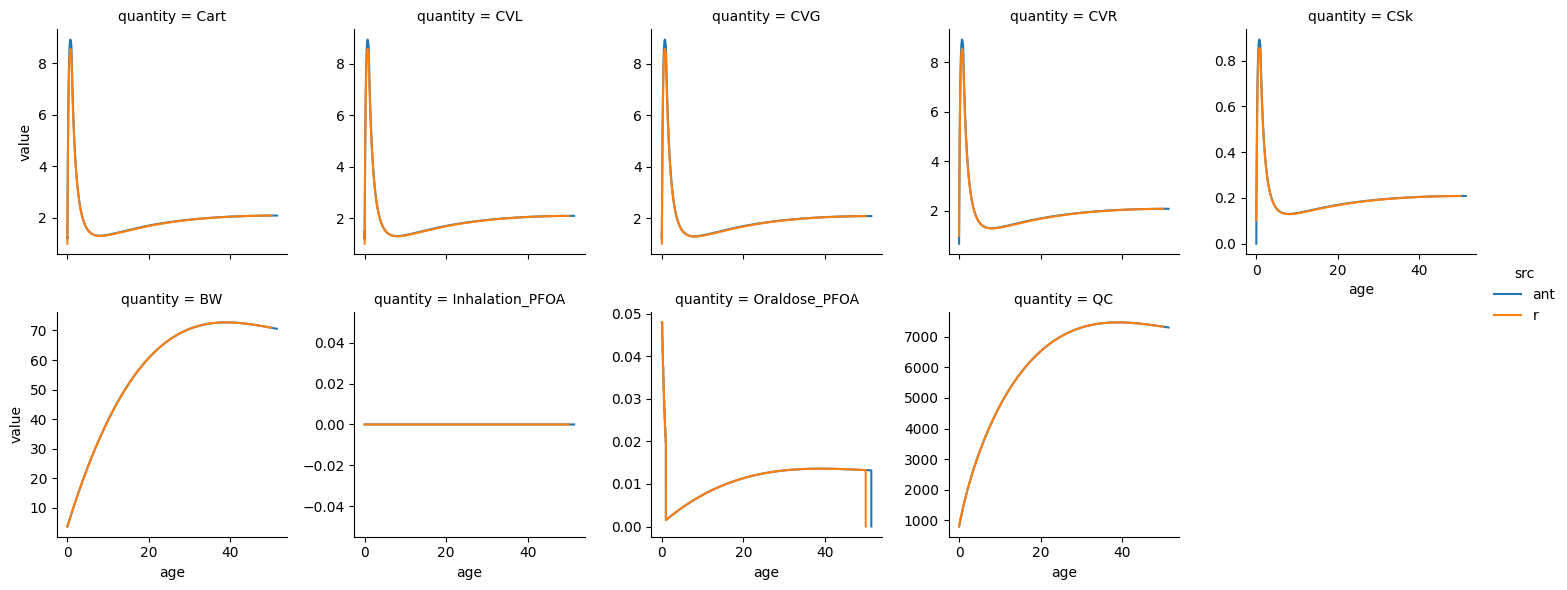

In [5]:
g = sns.FacetGrid(df_all, col='quantity', hue='src', col_wrap=5, sharey=False,
                 col_order=compartments_ant)
g.map(sns.lineplot, 'age', 'value')
g.add_legend()